In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

C:\Users\dharmendra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
bikes_hour_df_raws = pd.read_csv('hour.csv')
bikes_hour_df_raws.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikes_hour_df = bikes_hour_df_raws.drop(['casual','registered'],axis=1)
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [7]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

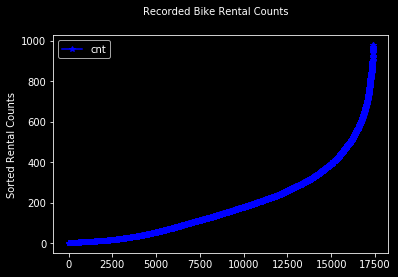

In [11]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

Quantitative Features vs. Rental Counts

Text(0, 0.5, 'Count of all Biks Rented')

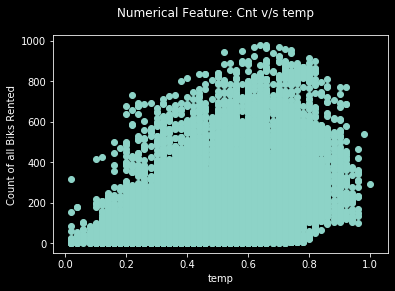

In [12]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Let’s Look at Categorical Features

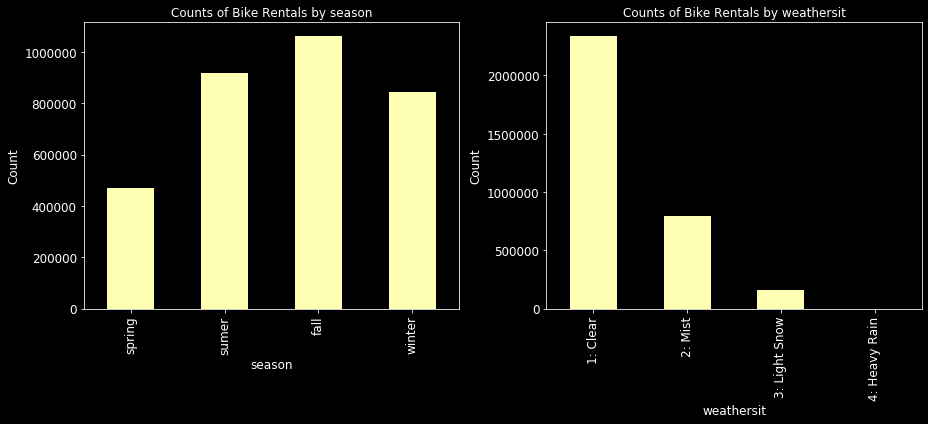

In [13]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

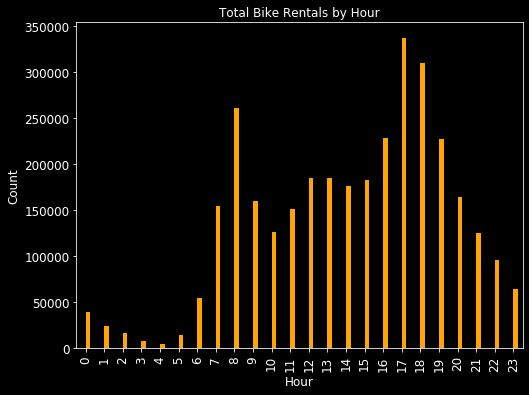

In [14]:
# alternative way of plotting using groupby
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_trian, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 139.14


In [20]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train = poly_feat.fit_transform(X_trian)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train, y_train)

# make the prediction
y_pred = lr_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 2 degrees: 120.44


In [21]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(4)
X_train = poly_feat.fit_transform(X_trian)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train, y_train)

# make the prediction
y_pred = lr_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 4 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 4 degrees: 452.36


In [22]:
def prepare_data_for_model(raw_dataframe, 
                           target_columns, 
                           drop_first = False, 
                           make_na_col = True):
    
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                            target_columns = ['season', 
                                                              'weekday', 
                                                              'weathersit'],
                                            drop_first = True)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant',  'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# print coefficients as this is what our web application will use in the end
print('Coefficients: \n', model_lr.coef_)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Coefficients: 
 [[ 8.15248087e+01 -3.05053709e-01  7.31700288e+00 -2.12212108e+01
   1.25047676e+01  2.56576596e+02  1.06754237e+02 -2.00225607e+02
   3.93454538e+01  2.54085994e+01  2.24746614e+00  7.16672281e+01
   7.81597009e-14 -4.49090388e+00  6.22106355e-01 -2.38810162e+00
  -3.93756806e+00  1.47802402e+00  1.23008686e+01  1.42108547e-14
   9.33424984e+00 -2.40957826e+01  3.07030469e+01  0.00000000e+00]]
Root Mean squared error: 139.40


In [23]:
bike_df_model_ready[['weathersit_2.0', 'weathersit_3.0', 'weathersit_4.0']].head()

,weathersit_2.0,weathersit_3.0,weathersit_4.0
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [24]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                             target_columns = ['season', 'weekday', 'weathersit'])
list(bike_df_model_ready.head(1).values)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
 
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

C:\Users\dharmendra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dharmendra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Root Mean squared error: 68.14


In [25]:
# prior hours
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])
# shift the count of the last two hours forward so the new count can take in consideratio how the last two hours went 
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

bike_df_model_ready =  pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how='inner', on = ['dteday', 'hr'])

# drop NAs caused by our shifting fields around
bike_df_model_ready = bike_df_model_ready.dropna()

outcome = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday','casual', 'registered']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 41.98


In [26]:
# prior hours
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])

189.47117044539073

In [27]:
# loop through each feature and calculate the R^2 score
features = ['hr', 'season', 'holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))

R^2 for hr is 0.159431
R^2 for season is 0.025891
R^2 for holiday is -0.001242
R^2 for temp is 0.168313


In [28]:
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print('\n')
print('Intercept: %f' % model_lr.intercept_)

# features with coefficients 
feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

Root Mean squared error: 148.22


Intercept: -103.609493


,coefficients,features
2,-28.296857,holiday
0,9.149312,hr
1,13.988868,season
3,311.148592,temp


In [29]:
# set up constants for our coefficients 
INTERCEPT = -121.029547
COEF_HOLIDAY = -23.426176   # day is holiday or not
COEF_HOUR = 8.631624        # hour (0 to 23)
COEF_SEASON_1 = 3.861149    # 1:springer
COEF_SEASON_2 = -1.624812   # 2:summer
COEF_SEASON_3 = -41.245562  # 3:fall
COEF_SEASON_4 = 39.009224   # 4:winter
COEF_TEMP = 426.900259      # norm temp in Celsius -8 to +39

In [30]:
np.mean(X_train['temp'])

0.49786730247471817

In [31]:
# mean values
MEAN_HOLIDAY = 0.0275   # day is holiday or not
MEAN_HOUR = 11.6        # hour (0 to 23)
MEAN_SEASON_1 = 1       # 1:spring
MEAN_SEASON_2 = 0       # 2:summer
MEAN_SEASON_3 = 0       # 3:fall
MEAN_SEASON_4 = 0       # 4:winter
MEAN_TEMP = 0.4967      # norm temp in Celsius -8 to +39


# try predicting something - 9AM with all other features held constant
rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY) \
    + (9 * COEF_HOUR) \
    + (MEAN_SEASON_1 * COEF_SEASON_1)  + (MEAN_SEASON_2 * COEF_SEASON_2) \
    + (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4) \
    + (MEAN_TEMP * COEF_TEMP)

print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))  

Estimated bike rental count for selected parameters: 171
